In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from utility_functions import preprocess_data

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [3]:
depressive_data = pd.read_csv("data/final_depressive_dataset.csv")
non_depressive_data = pd.read_csv("data/final_non_depressive_dataset.csv")

### Combine the two datasets

In [4]:
training_data = pd.concat([depressive_data, non_depressive_data])
training_data.Tweet = training_data.Tweet.astype(str)

In [5]:
training_data.head()

,Tweet,Depressive
0,i was severely depressed during the summer of 2017* that i seriously thought what i have isnt depression anymore it surpassed it that iâm the first holder of a new worse mental illness,1
1,"What it's like to be me: I wake up in a panic knowing all the things that have to get done today, already dreading the moment my feet touch the ground. #MentalHealthIssues #Anxienty #Depression",1
2,"@aquariusguts bpd, anxiety and depression ð»",1
3,Depression makes you forget you were trying to not gain weight,1
4,can we really survive depression???? https://twitter.com/depressionarmy/status/1045015996321476608Â â¦,1


In [6]:
training_data.tail()

,Tweet,Depressive
876147,Just woke up. Having no school is the best feeling ever,0
876148,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,0
876149,Are you ready for your MoJo Makeover? Ask me for details,0
876150,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,0
876151,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H,0


In [7]:
training_data.to_csv("data/combined_tweets.csv", index=False)

### Perform data cleaning

In [8]:
text, sentiment = list(training_data["Tweet"]), list(training_data["Depressive"])

In [9]:
import time
t = time.time()
processed_tweets = preprocess_data(text)
print(f"Text Preprocessing complete.")
print(f"Time Taken: {round(time.time()-t)} seconds")

Text Preprocessing complete.
Time Taken: 329 seconds


In [10]:
print(len(processed_tweets))
print(len(sentiment))

1081866
1081866


In [11]:
train_data = pd.DataFrame({"Tweet" : processed_tweets, "Depressive" : sentiment})
train_data.head()

,Tweet,Depressive
0,severely depressed summer seriously thought haveis not depression anymore surpassed first holder new worse mental illness,1
1,like wake panic knowing thing get done today already dreading moment foot touch ground mentalhealthissues anxienty depression,1
2,bpd anxiety depression,1
3,depression make forget trying not gain weight,1
4,really survive depression,1


In [12]:
train_data.tail()

,Tweet,Depressive
1081861,woke no school best feeling ever,0
1081862,thewdb com cool hear old walt interview,0
1081863,ready mojo makeover ask detail,0
1081864,happy th birthday boo time tupac amaru shakur,0
1081865,happy charitytuesday,0


In [13]:
train_data.to_pickle("data/processed_training_data.pkl")

In [16]:
train_data["Depressive"].value_counts()

0    876152
1    205714
Name: Depressive, dtype: int64

### Exploratory Data Analysis

[Text(0, 0, '0'), Text(1, 0, '1')]

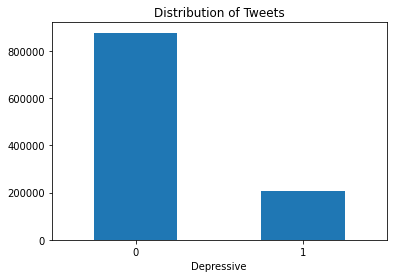

In [15]:
# Plotting the distribution for dataset.
ax = train_data.groupby("Depressive").count().plot(kind="bar", title="Distribution of Tweets", 
                                               legend=False)
ax.set_xticklabels(["0", "1"], rotation=0)

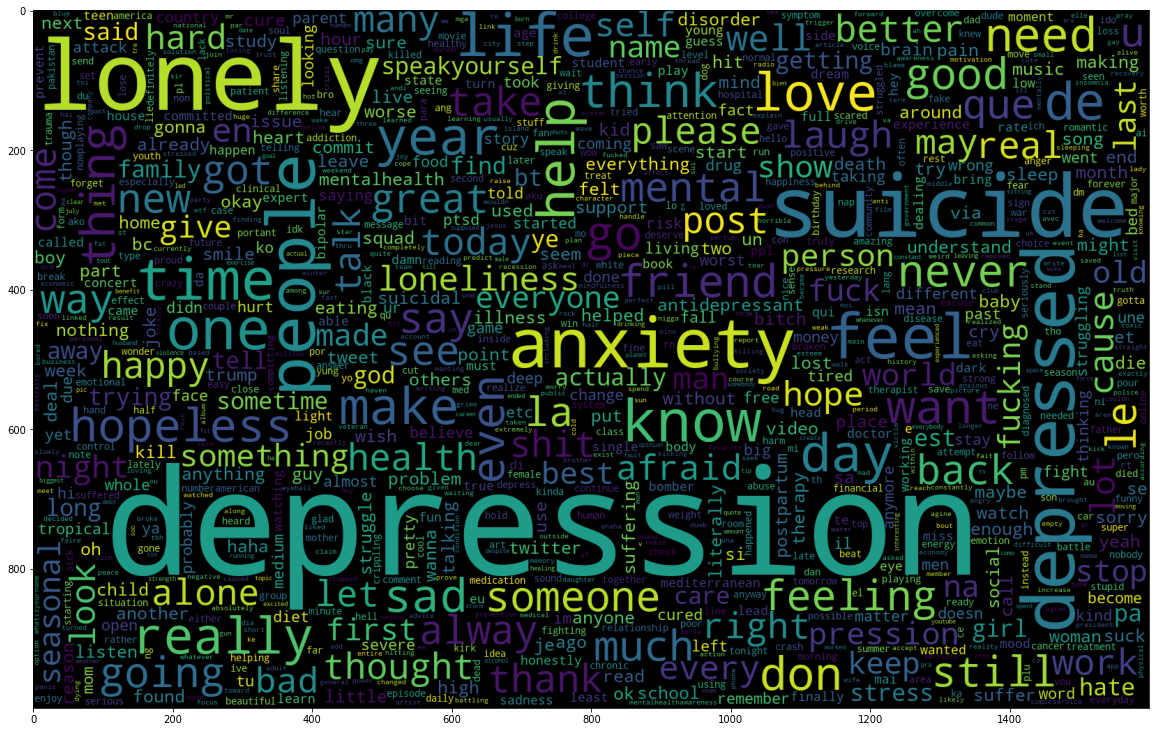

In [17]:
## Wordcloud for depressive tweets
data_neg = train_data["Tweet"].iloc[:205715]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

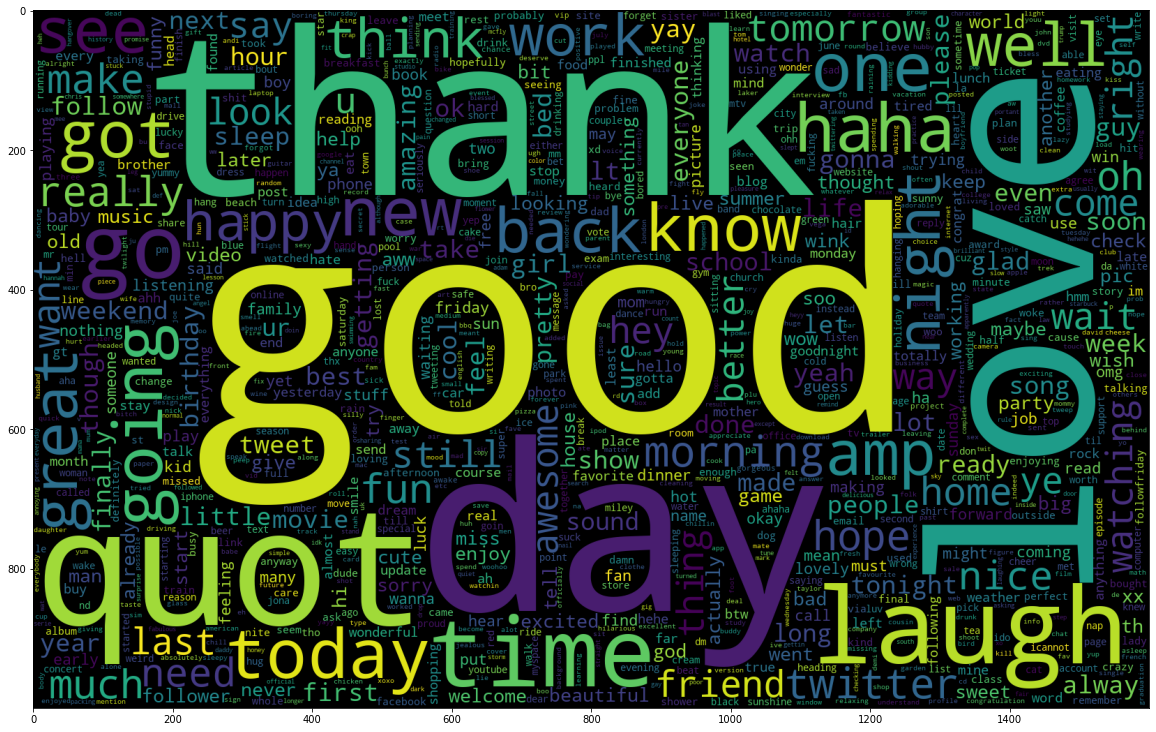

In [18]:
## Wordcloud for non depressive tweets
data_pos = train_data["Tweet"].iloc[205715:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)